In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [140]:
batters_df = pd.read_csv('../DEA Notebooks/cleaned_batting_years_1985_to_2017.csv')

In [141]:
del batters_df['Unnamed: 0']

#create log salary to look at correlations
batters_df['LOG_SALARY'] = np.log(batters_df['SALARY'])

In [142]:
subset_to_test_with = batters_df[(batters_df.PA > 400)]
subset_to_test_with.shape

(6428, 50)

In [143]:
batters_df.columns

Index(['ID', 'NAME', 'HEIGHT', 'WEIGHT', 'YEAR', 'AGE', 'TM', 'LG', 'G', 'PA',
       'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA',
       'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB',
       'AWARDS', 'SALARY', 'BATS_Left', 'BATS_Right', 'LG_SALARY_YEAR',
       'LG_SALARY_MEAN', 'POS_1', 'POS_2', 'POS_3', 'POS_4', 'POS_5', 'POS_6',
       'POS_7', 'POS_8', 'POS_9', 'POS_D', 'LG_MEAN_HR', 'LOG_SALARY'],
      dtype='object')

In [144]:
counting_stats = ['PA',
       'R', 'H', '2B', 'RBI', 'SB', 'CS', 'BB', 'SO']
prob_stats = ['BA',
       'OBP', 'SLG', 'OPS', 'H','R']
physical_stats = ['AGE','HEIGHT','WEIGHT','BATS_Left','BATS_Right']
salary_stats = ['SALARY','LG_SALARY_YEAR']
position = ['POS_1', 'POS_2', 'POS_3', 'POS_4', 'POS_5', 'POS_6',
       'POS_7', 'POS_8', 'POS_9', 'POS_D']
f3 = ['AGE', 'OBP', 'SLG', 'HR', 'LG_SALARY_MEAN', 'RBI']

hr_f1 = ['AGE','WEIGHT', 'R', 'SB', 'CS', '3B', 'RBI', 'SB', 'CS', 'BB', 'SO', 'GDP', 'PA']

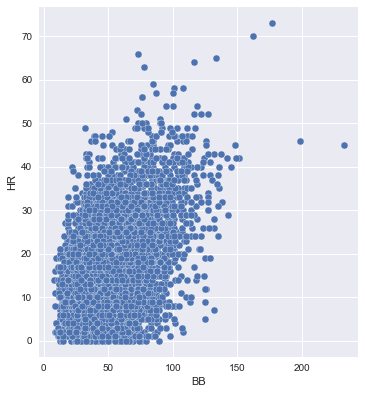

In [155]:
y_vars = 'HR'
x_vars = hr_f1

bonds = sns.pairplot(subset_to_test_with, x_vars=['BB'], y_vars=y_vars)
bonds.fig.set_size_inches(7,7)


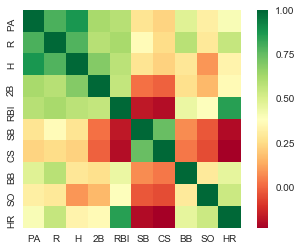

In [146]:
sns.heatmap(subset_to_test_with[counting_stats + ['HR']].corr(), square=True, cmap='RdYlGn')

AttributeError: 'AxesSubplot' object has no attribute 'set_size_inches'

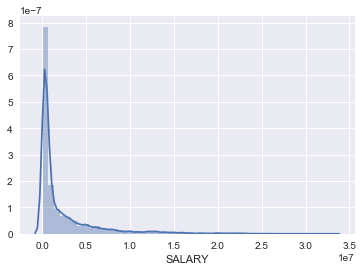

In [162]:
sns.distplot(batters_df['SALARY'])

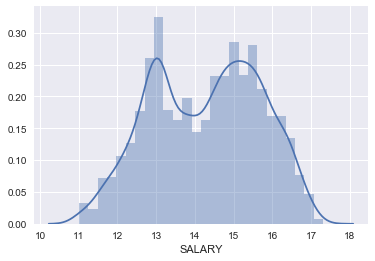

In [148]:
sns.distplot(np.log(subset_to_test_with['SALARY']))

In [149]:
batters_df['HR'].describe()

count    13768.000000
mean        10.222981
std         10.032617
min          0.000000
25%          2.000000
50%          7.000000
75%         15.000000
max         73.000000
Name: HR, dtype: float64

In [159]:
batters_df[(batters_df.BB >= 160)]

,ID,NAME,HEIGHT,WEIGHT,YEAR,AGE,TM,LG,G,PA,...,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,POS_9,POS_D,LG_MEAN_HR,LOG_SALARY
11462,bondsba01,Barry Bonds,73,185,2002,37.0,SFG,NL,143,612.0,...,0,0,0,0,1,0,0,0,8.0,16.523561
11580,bondsba01,Barry Bonds,73,185,2004,39.0,SFG,NL,147,617.0,...,0,0,0,0,1,0,0,0,9.0,16.705882
12658,bondsba01,Barry Bonds,73,185,2001,36.0,SFG,NL,153,664.0,...,0,0,0,0,1,0,0,0,8.0,16.147654
13048,mcgwima01,Mark McGwire,77,215,1998,34.0,STL,NL,155,681.0,...,1,0,0,0,0,0,0,0,6.0,16.004743
